In [567]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
import pandas as pd
import pickle
import string
import re
import string
from sklearn.model_selection import cross_validate as cross_validation, ShuffleSplit, cross_val_score, train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.svm import *
# from sklearn.tree import *
from sklearn.neural_network import *
from sklearn.linear_model import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import *
from sklearn.impute import IterativeImputer
from sklearn.naive_bayes import *
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [525]:
# data = pd.read_pickle('imputed_data_forest_corr.pkl')
data = pd.read_pickle('imputed_data_forest_2.pkl')

print(list(data.columns))
data.shape

['YEAR', 'ITERATION', 'GPS_LAT', 'GPS_LON', 'GPS_ALT', 'HHsizemembers', 'HHsizeMAE', 'LandOwned', 'LandCultivated', 'LivestockHoldings', 'NrofMonthsFoodInsecure', 'PPI_Threshold', 'PPI_Likelihood', 'score_HDDS_GoodSeason', 'score_HDDS_farmbasedGoodSeason', 'score_HDDS_purchasedGoodSeason', 'score_HDDS_BadSeason', 'score_HDDS_farmbasedBadSeason', 'score_HDDS_purchasedBadSeason', 'TVA_USD_PPP_pmae_pday', 'currency_conversion_factor', 'total_income_USD_PPP_pHH_Yr', 'offfarm_income_USD_PPP_pHH_Yr', 'farm_income_USD_PPP_pHH_Yr', 'value_farm_produce_USD_PPP_pHH_Yr', 'crop_sales_USD_PPP_pHH_Yr', 'value_crop_produce_USD_PPP_pHH_Yr', 'value_crop_consumed_USD_PPP_pHH_Yr', 'livestock_prodsales_USD_PPP_pHH_Yr', 'value_livestock_production_USD_PPP_pHH_Yr', 'value_livestock_prod_consumed_USD_PPP_pHH_Yr', 'Market_Orientation', 'Livestock_Orientation', 'Food_Availability_kCal_MAE_day', 'Food_Self_Sufficiency_kCal_MAE_day', 'NrofMonthsWildFoodCons', 'GHGEmissions', 'Gender_MaleControl', 'Gender_FemaleC

(35726, 98)

In [569]:
X = data.drop(['Food_InsecurityLevel','YEAR','currency_conversion_factor'],axis=1)
y = data['Food_InsecurityLevel']
print(y)

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_new2 = scaler.fit_transform(X_new)
# X_new2

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)

# from sklearn.feature_selection import SelectFromModel
# from sklearn.decomposition import KernelPCA
# transformer = SelectFromModel(estimator=RandomForestRegressor()).fit(X_new, y)
# X_new = transformer.transform(X_new)
# X_new.shape

# fs_ = SelectKBest(score_func=mutual_info_classif, k=70)
# fs_.fit(X_new, y)
# mi_support = fs_.get_support()
# X_new1 = fs_.transform(X_new)

# clf = ExtraTreesClassifier(n_estimators=60)
# clf = clf.fit(X, y)
# clf.feature_importances_  
# model = SelectFromModel(clf, prefit=True)

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_new, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new1 = model.transform(X_new)

# transformer = SelectFromModel(estimator=AdaBoostClassifier()).fit(X_new, y)
# X_new1 = transformer.transform(X_new)

# from keras.utils import to_categorical
# y = to_categorical(y)
# y = y[:,[1,2,3,4]]
print(X_new.shape)
y.shape

0        3
1        4
2        4
3        2
4        4
        ..
35721    1
35722    1
35723    1
35724    1
35725    1
Name: Food_InsecurityLevel, Length: 35726, dtype: int32
(35726, 95)


(35726,)

In [570]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X_new, y, test_size=0.25, random_state=0)
# X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.25, random_state=0)

In [405]:
print(len(X_train))
# print(len(X_val))
# print(len(X_test))
print(len(y_train))
# print(len(y_val))
# print(len(y_test))

# X_train

26796
26796


In [558]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Model

input_layer = Input(shape=(95,))
hidden_layer1 = Dense(256, activation='relu')(input_layer)
dropout_1 = Dropout(0.6)(hidden_layer1)
hidden_layer2 = Dense(256, activation='relu')(dropout_1)
dropout_2 = Dropout(0.6)(hidden_layer2)
hidden_layer3 = Dense(128, activation='relu')(dropout_2)
dropout_3 = Dropout(0.6)(hidden_layer3)
hidden_layer4 = Dense(128, activation='relu')(dropout_3)
dropout_4 = Dropout(0.6)(hidden_layer4)
hidden_layer5 = Dense(128, activation='relu')(dropout_4)
output = Dense(5, activation='softmax')(hidden_layer5)
model = Model(inputs = input_layer, outputs = output)



# model = Sequential()
# model.add(Dense(300, input_dim=89, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(300, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(300, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation='softmax'))

In [559]:
model.summary()

Model: "model_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_57 (InputLayer)        (None, 95)                0         
_________________________________________________________________
dense_306 (Dense)            (None, 256)               24576     
_________________________________________________________________
dropout_200 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_307 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_201 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_308 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_202 (Dropout)        (None, 128)               0  

In [560]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test_val, y_test_val), epochs=100)

Train on 26794 samples, validate on 8932 samples
Epoch 1/100
26794/26794 [==============================] - 9s 323us/step - loss: 1.2710 - accuracy: 0.4018 - val_loss: 1.1403 - val_accuracy: 0.5233
Epoch 2/100
26794/26794 [==============================] - 5s 197us/step - loss: 1.1146 - accuracy: 0.5160 - val_loss: 1.0602 - val_accuracy: 0.5620
Epoch 3/100
26794/26794 [==============================] - 5s 197us/step - loss: 1.0519 - accuracy: 0.5595 - val_loss: 0.9927 - val_accuracy: 0.5836
Epoch 4/100
26794/26794 [==============================] - 5s 195us/step - loss: 1.0190 - accuracy: 0.5767 - val_loss: 0.9882 - val_accuracy: 0.5955
Epoch 5/100
26794/26794 [==============================] - 5s 193us/step - loss: 1.0064 - accuracy: 0.5845 - val_loss: 0.9996 - val_accuracy: 0.6049
Epoch 6/100
26794/26794 [==============================] - 5s 194us/step - loss: 0.9929 - accuracy: 0.5921 - val_loss: 0.9772 - val_accuracy: 0.6116
Epoch 7/100
26794/26794 [==============================] 

C:\Users\Asus\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (1.685251). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.847705). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


26794/26794 [==============================] - 7s 264us/step - loss: 0.8839 - accuracy: 0.6415 - val_loss: 0.8814 - val_accuracy: 0.6446
Epoch 75/100
26794/26794 [==============================] - 5s 196us/step - loss: 0.8831 - accuracy: 0.6428 - val_loss: 0.8862 - val_accuracy: 0.6415
Epoch 76/100
26794/26794 [==============================] - 5s 197us/step - loss: 0.8816 - accuracy: 0.6414 - val_loss: 0.8887 - val_accuracy: 0.6355
Epoch 77/100
26794/26794 [==============================] - 6s 209us/step - loss: 0.8823 - accuracy: 0.6433 - val_loss: 0.8987 - val_accuracy: 0.6351
Epoch 78/100
26794/26794 [==============================] - 7s 259us/step - loss: 0.8787 - accuracy: 0.6441 - val_loss: 0.8865 - val_accuracy: 0.6384
Epoch 79/100
26794/26794 [==============================] - 6s 213us/step - loss: 0.8820 - accuracy: 0.6443 - val_loss: 0.8897 - val_accuracy: 0.6406
Epoch 80/100
26794/26794 [==============================] - 6s 206us/step - loss: 0.8811 - accuracy: 0.6428 - val

Train: 0.680, Validation: 0.646


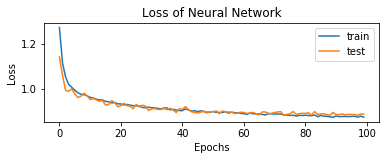

In [561]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
# model.predict(X_test_val)
# model.evaluate(X_test_val, y_test_val)

# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test_val, y_test_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, test_acc))
# plot loss during training
plt.subplot(211)
plt.title('Loss of Neural Network')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


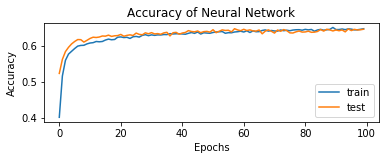

In [562]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy of Neural Network')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [563]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_val, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test_val, y_pred_bool))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_val, y_pred_bool)

8932/8932 [==============================] - 1s 118us/step
              precision    recall  f1-score   support

           1       0.69      0.81      0.75      2831
           2       0.76      0.28      0.41      1520
           3       0.55      0.62      0.58      2353
           4       0.66      0.71      0.68      2228

    accuracy                           0.65      8932
   macro avg       0.67      0.61      0.61      8932
weighted avg       0.66      0.65      0.63      8932



array([[2291,   44,  302,  194],
       [ 572,  432,  409,  107],
       [ 276,   91, 1455,  531],
       [ 180,    2,  457, 1589]], dtype=int64)

In [329]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
model = DummyClassifier(strategy='most_frequent')
# fit model
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test_val)
# calculate accuracy
accuracy = accuracy_score(y_test_val, yhat)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.338


In [521]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes = 100).fit(X_train, y_train)
score = classifier.score(X_test_val, y_test_val)
score

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6358038513210927

In [522]:
y_pred = classifier.predict(X_test_val)

print(classification_report(y_test_val, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.81      0.74      3019
           2       0.50      0.41      0.45      1403
           3       0.60      0.52      0.56      2264
           4       0.65      0.66      0.66      2246

    accuracy                           0.64      8932
   macro avg       0.61      0.60      0.60      8932
weighted avg       0.63      0.64      0.63      8932



In [574]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier().fit(X_train, y_train)
score1 = classifier1.score(X_test_val, y_test_val)
print(score1)

y_pred1 = classifier1.predict(X_test_val)

print(classification_report(y_test_val, y_pred1))

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6553963278101209
              precision    recall  f1-score   support

           1       0.69      0.82      0.75      2831
           2       0.62      0.42      0.50      1520
           3       0.61      0.56      0.59      2353
           4       0.66      0.70      0.68      2228

    accuracy                           0.66      8932
   macro avg       0.65      0.63      0.63      8932
weighted avg       0.65      0.66      0.65      8932



In [573]:
classifier2 = ExtraTreesClassifier().fit(X_train, y_train)
score2 = classifier2.score(X_test_val, y_test_val)
print(score1)

y_pred2 = classifier2.predict(X_test_val)

print(classification_report(y_test_val, y_pred2))

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6510300044782803
              precision    recall  f1-score   support

           1       0.70      0.82      0.76      2831
           2       0.62      0.44      0.51      1520
           3       0.61      0.57      0.59      2353
           4       0.67      0.70      0.68      2228

    accuracy                           0.66      8932
   macro avg       0.65      0.63      0.64      8932
weighted avg       0.65      0.66      0.65      8932



In [608]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
modelXG = OneVsRestClassifier(XGBClassifier(base_score = 0.8, booster='gbtree', max_depth = 16, objective='multi:softmax', num_class = 5))
# modelXG = XGBClassifier(base_score = 0.5, booster='gbtree')
modelXG.fit(X_train, y_train)

C:\Users\Asus\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:04:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:05:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:05:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

OneVsRestClassifier(estimator=XGBClassifier(base_score=0.8, booster='gbtree',
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=16,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_class=5, num_parallel_tree=None,
                                            objective='multi:softmax',
                                

In [609]:
from sklearn.metrics import accuracy_score
y_pred = modelXG.predict(X_test_val)
# predictions = [round(value) for value in y_pred]
# evaluate predictions
# y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test_val, y_pred))

accuracy = accuracy_score(y_test_val, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

ValueError: operands could not be broadcast together with shapes (8932,) (5,) (8932,) 